In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter



In [2]:
# cleaned data
data_path = "chicago_crimes_all_cleaned.csv"

# Read the year data
data_df = pd.read_csv(data_path)



In [3]:
data_df = pd.read_csv(data_path)
data_df.head()

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0


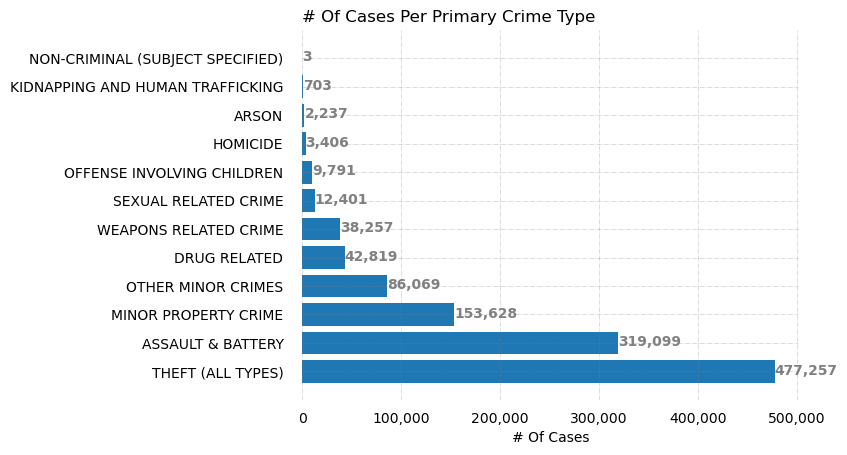

In [4]:
# Generate a bar plot
pandas_df_bar = pd.DataFrame(data_df.groupby(["Primary Type"], as_index=False)["Case Number"].count()).sort_values("Case Number", ascending=True)
pandas_df_bar

count = pandas_df_bar['Case Number']
ptype = pandas_df_bar['Primary Type']

# Figure Size
fig, ax = plt.subplots()
 
# Horizontal Bar Plot
ax.barh(ptype, count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

# Show top values
ax.invert_yaxis()

plt.xlabel("# Of Cases")

# Add annotation to bars
for i in ax.patches:

    num = i.get_width()
    num_format = '{:,.0f}'.format(num)
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             num_format,
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('# Of Cases Per Primary Crime Type', loc ='left')

# Show Plot
plt.show()

pandas_df_bar.to_excel("first.xlsx")


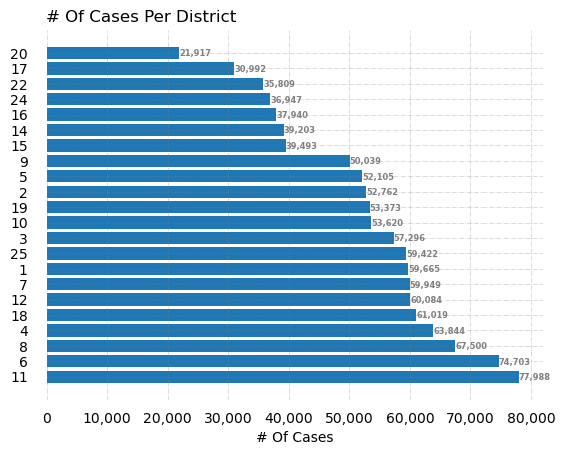

In [5]:
# Generate a bar plot
pandas_df_bar_district = pd.DataFrame(data_df.groupby(["District"], as_index=False)["Case Number"].count()).sort_values("Case Number", ascending=False)

pandas_df_bar_district["District"] = pandas_df_bar_district["District"].astype(str)

count = pandas_df_bar_district['Case Number']
ptype = pandas_df_bar_district['District']

# Figure Size
fig, ax = plt.subplots()
 
# Horizontal Bar Plot
ax.barh(ptype, count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

# Show top values
# ax.invert_yaxis()

plt.xlabel("# Of Cases")

# Add annotation to bars
for i in ax.patches:

    num = i.get_width()
    num_format = '{:,.0f}'.format(num)
    plt.text(i.get_width()+0.2, i.get_y()+0.2,
             num_format,
             fontsize = 6, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('# Of Cases Per District', loc ='left')

# Show Plot
plt.show()


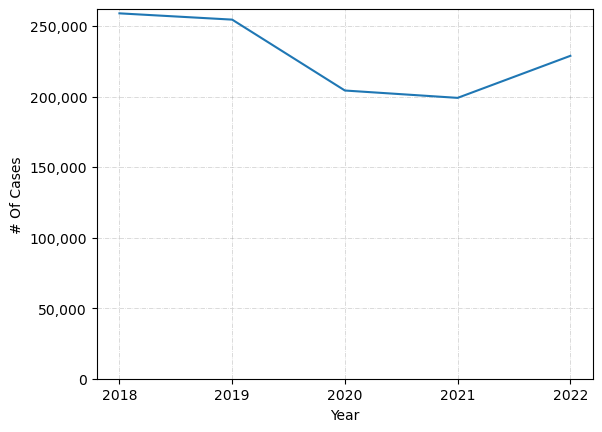

In [6]:
pandas_df_bar_year = pd.DataFrame(data_df.groupby(["Year"], as_index=False)["Case Number"].count())

pandas_df_bar_year.rename(columns = {"Case Number": "Total"}, inplace=True)

pandas_df_bar_year["Year"] = pandas_df_bar_year["Year"].astype(str)

pandas_df_bar_year

years = pandas_df_bar_year["Year"]
vol = pandas_df_bar_year["Total"]

# Figure Size
fig, ax = plt.subplots()
 
ax.plot(years, vol)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

plt.xlabel("Year")
plt.ylim(bottom=0)
plt.ylabel("# Of Cases")
plt.show()


In [7]:
pandas_df_bar_district_type = pd.DataFrame(data_df.groupby(["District","Primary Type"], as_index=False)["Case Number"].count()).sort_values("Case Number", ascending=False)

pandas_df_bar_district_type["District"] = pandas_df_bar_district_type["District"].astype(str)

pandas_df_bar_district_type.to_excel("district_types.xlsx")

# count = pandas_df_bar_district['ID']
# ptype = pandas_df_bar_district['District']





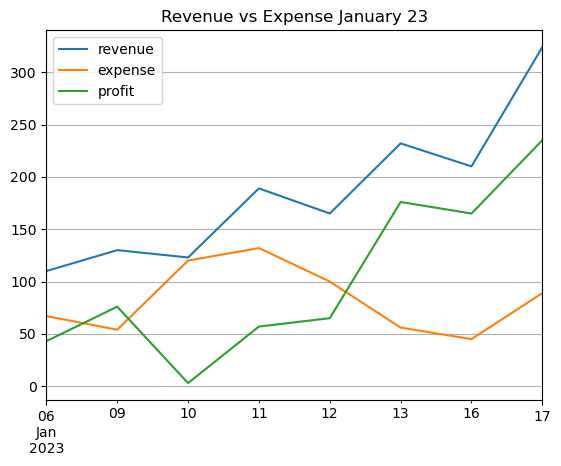

In [7]:

%matplotlib inline

# define DataFrame
time_stamps = pd.Series(pd.date_range(start='01/06/23', end = '01/17/23', freq='B'))
revenue = [110, 130, 123, 189, 165, 232, 210, 324]
expense = [67, 54, 120, 132, 100, 56, 45, 89]

performance = pd.DataFrame(dict(revenue=revenue, expense=expense), index = time_stamps)
#calculate the daily profit
performance['profit'] = performance['revenue'] - performance['expense']

ts_plot = performance.plot(kind='line', \
                     title = 'Revenue vs Expense January 23');
ts_plot.grid()
# define the legend location
ts_plot.legend(loc='upper left');
